# Graphs for Bachelor Thesis

In [1]:
from rcwa import Layer, LayerStack, Source, Solver, Plotter
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def lorentzian(x, amp, ctr, wid):
    return amp*wid**2/((x-ctr)**2+wid**2)

In [3]:
#Initial Parameters

designWavelength = 0.720 #Initial Incident Wavelength in micrometers

#Wavelength Range
startWavelength = 0.5
stopWavelength = 1.0

#Step-Size
stepWavelength = 0.0001 

#Refractive Indicies
n1 = 2.5437 # refractive index of layer 1 (TiO2; 720nm)
n2 = 1.4549 # refractive index of layer 2 (SiO2; 720nm)
n3 = 2.1077 + 0.5j # refractive index of insulator (hBN; 720nm)
n4 = 3.7900 + 1j # refractive index of 2D-semiconductor (WSe2; 720nm)
n5 = 1.4860 # refractive index for PMMA (720nm)
    
#Thicknesses of the layers
t1 = designWavelength/4/n1
t2 = designWavelength/4/n2
t3 = designWavelength/2/n2 #thickness for optical cavity

reflectionLayer = Layer(n=1)
transmissionLayer = Layer(n=3.7519) #GaAs Substrate

#DBR-Mirror Layers
layer0 = Layer(n=n1, thickness=t1)
layer1 = Layer(n=n2, thickness=t2)
layer2 = Layer(n=n2, thickness=t3) #Optical cavity Initial (without anything inside)
    
#Initial Solving
stack = LayerStack(layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer1, layer0, #|
                   layer2,
                   layer0, layer1, #|
                   layer0, layer1, #BOTTOM DBR
                   layer0, layer1, #|
                   layer0, layer1, #|
                   layer0, layer1, #|
                   layer0, layer1, #|
                   layer0, layer1, #|
                   layer0, layer1, #|
                   layer0, layer1, #|
                   layer0, layer1, #|
                   incident_layer=reflectionLayer, 
                   transmission_layer=transmissionLayer)

#Specifiying the source wavelength
source = Source(wavelength=designWavelength)

In [4]:
#Solving

print("Solving system...")
TMMSolver = Solver(stack, source, 1)
wavelengths = np.arange(startWavelength, stopWavelength + stepWavelength,
            stepWavelength)
results = TMMSolver.solve(wavelength=wavelengths)

4/5001 |                                                        |ETA:   0:02:06

Solving system...


5001/5001 |#####################################################|Time:  0:01:31


/var/folders/s2/hl_85_4n61xcr2235_6_039c0000gn/T/ipykernel_6351/4098329556.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_xticklabels, fontsize=30)
/var/folders/s2/hl_85_4n61xcr2235_6_039c0000gn/T/ipykernel_6351/4098329556.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_yticklabels, fontsize=30)


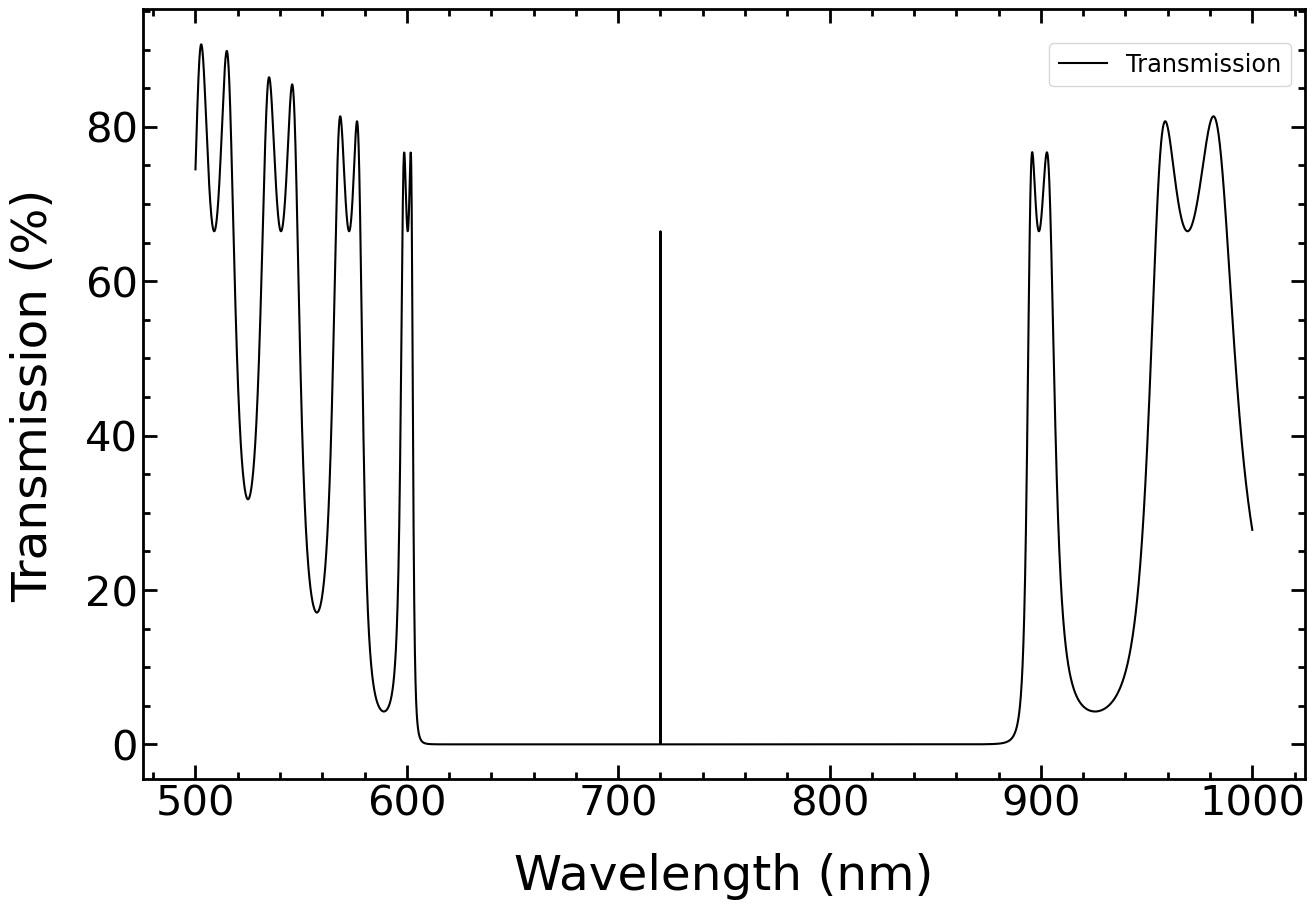

In [5]:
#Plotting (Full Spectrum)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fig, ax = results.plot(x='wavelength', y=['TTot'], ax=ax)

# Set the color of the lines to black
for line in ax.get_lines():
    line.set_color('black')

ax.set_xlabel("Wavelength (nm)", fontsize=35, labelpad=20)
ax.set_ylabel("Transmission (%)", fontsize=35, labelpad=20)

labels = ['Transmission']
ax.legend(labels=labels, fontsize='xx-large', loc=(0.78, 0.90))
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)

# Customize tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black')    

# Customize minor tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.tick_params(top="on", bottom="on", right="on", left="on")

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Setting custom tick marks and labels for x-axis
custom_xticklabels = ['', '500', '600', '700', '800', '900', '1000'] 
ax.set_xticklabels(custom_xticklabels, fontsize=30)

# Setting custom tick marks and labels for y-axis
custom_yticklabels = ['','0', '20', '40', '60', '80']  
ax.set_yticklabels(custom_yticklabels, fontsize=30)

#Saving the figure
plt.savefig('Cavity_Transmission_10_pairs_SMALL.png', dpi=500, transparent=False, bbox_inches='tight')

plt.show()

In [6]:
#Specify the new wavelength range
startWavelength = 0.71995
stopWavelength = 0.72005

#Step-Size
stepWavelength = 0.0000001 

#Solving
print("Solving system...")
TMMSolver = Solver(stack, source, 1)
wavelengths = np.arange(startWavelength, stopWavelength + stepWavelength,
            stepWavelength)
results = TMMSolver.solve(wavelength=wavelengths)

#Defining the peak and x-value position (wavelength)
peak = max(results['TTot'])
x_val_ttot = [results['TTot'].index(peak)] #index of the peak
x_val_wavelength = [wavelengths[x_val_ttot[0]]] #index of the wavelength at the peak (resonant frequency)

print(f"The resonant peak wavelength is: {x_val_wavelength} micrometers")

#Quality Factor Calculation
initial_guess = [peak, x_val_wavelength[0], 0.00002] #amp, ctr, wid
popt, pcov = curve_fit(lorentzian, wavelengths, results['TTot'], p0=initial_guess, maxfev=2000000000)
lorentzian_model = lorentzian(wavelengths, *popt)
res_freq = popt[1]
FWHM = abs(2*popt[2])
q_factor = (res_freq/FWHM)

print(f"The Q-Factor is: {q_factor}")

11/1001 |                                                       |ETA:   0:00:19

Solving system...


1001/1001 |#####################################################|Time:  0:00:17


The resonant peak wavelength is: [0.7199999999999737] micrometers
The Q-Factor is: 141851.1936532106


/var/folders/s2/hl_85_4n61xcr2235_6_039c0000gn/T/ipykernel_6351/1940384456.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_xticklabels, fontsize=30)
/var/folders/s2/hl_85_4n61xcr2235_6_039c0000gn/T/ipykernel_6351/1940384456.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_yticklabels, fontsize=30)


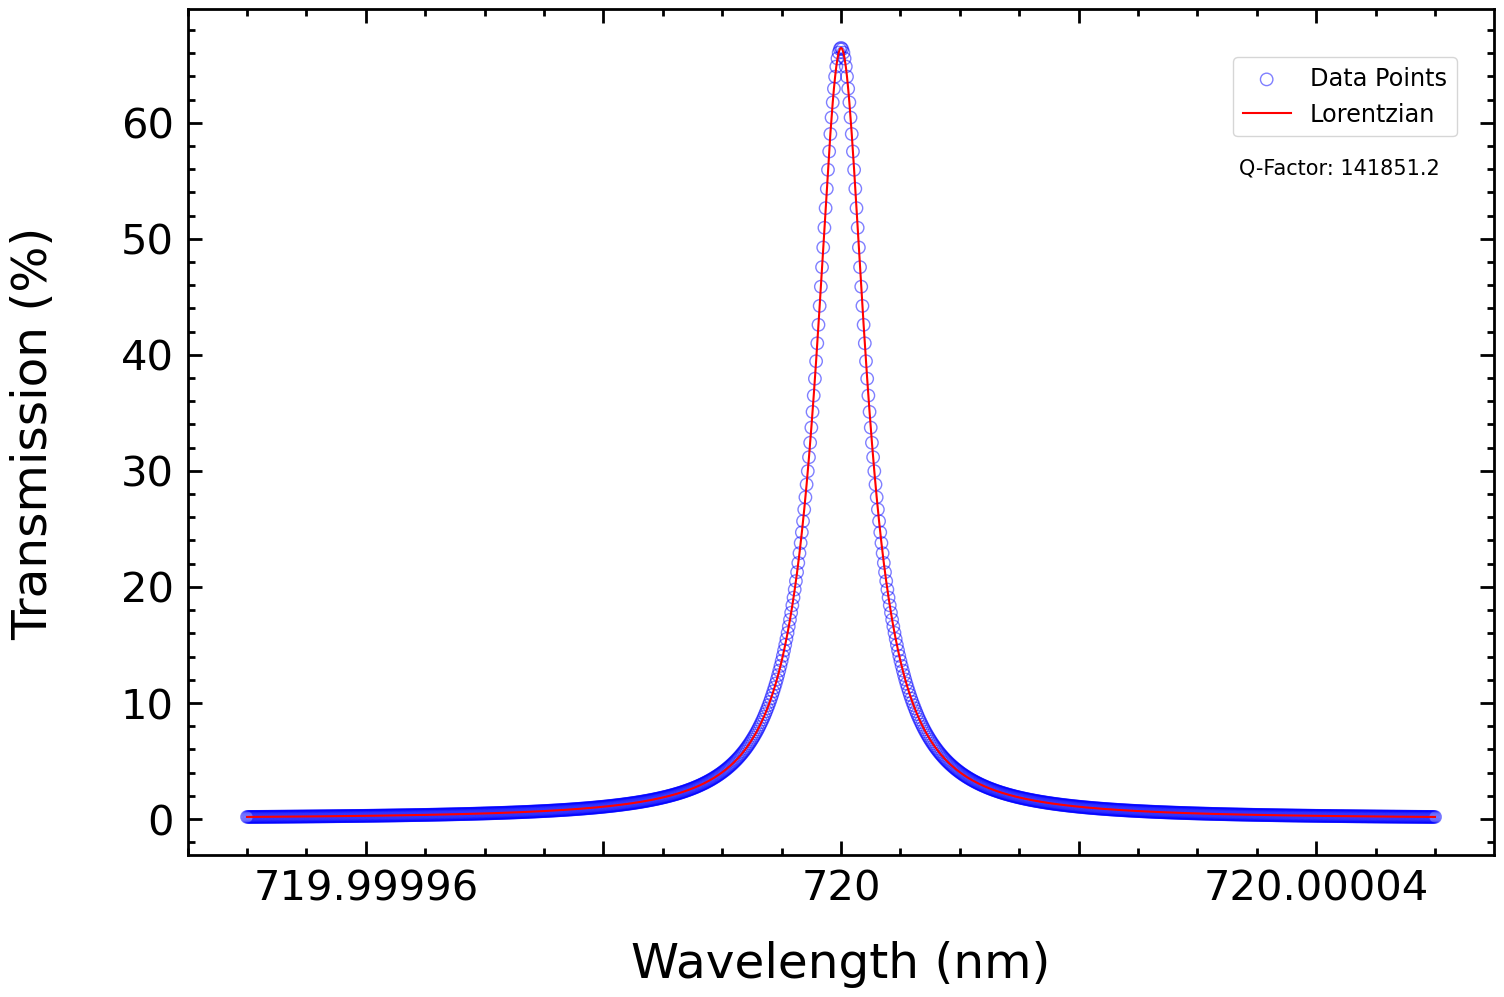

In [7]:
#Plotting (Full Spectrum)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.set_xlabel("Wavelength (nm)", fontsize=35)
ax.xaxis.set_label_coords(.5, -.1)

ax.set_ylabel("Transmission (%)", fontsize=35)
ax.yaxis.set_label_coords(-.1, .5)

ax.scatter(results['wavelength'], results['TTot'], s=80, alpha=0.5, facecolors='none', edgecolors='b', label='Data Points')
ax.plot(wavelengths, lorentzian_model, color='red', label='Lorentzian')
plt.figtext(0.82, 0.82, f"Q-Factor: {round(q_factor, 1)}", fontsize=15)

ax.legend(fontsize='xx-large', loc=(0.8, 0.85))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
fig.tight_layout()

# Customize tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black',    # Color of ticks
               pad=10)            # Distance of tick labels from the axis

# Customize minor tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.tick_params(top="on")
ax.tick_params(bottom="on")
ax.tick_params(right="on")
ax.tick_params(left="on")

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Setting custom tick marks and labels for x-axis
custom_xticklabels = ['0', '719.99996', '', '720', '', '720.00004'] 
ax.set_xticklabels(custom_xticklabels, fontsize=30)

# Setting custom tick marks and labels for y-axis
custom_yticklabels = ['0', '0', '10', '20', '30', '40', '50', '60', '70']  
ax.set_yticklabels(custom_yticklabels, fontsize=30)

#Saving the figure
plt.savefig('Lorentzian_fit_SMALL.png', dpi=500, transparent=False, bbox_inches='tight')

plt.show()